/kaggle/input/new-sp-yt/New_Spotify_Youtube.csv
/kaggle/input/danc-val/dance-val.csv
/kaggle/input/temp-stream/tempo-stream.csv
Top 5 happy songs with high danceability:
                    Artist                                      Track  \
702              Timbaland                              Give It To Me   
14195   Super Simple Songs                            If You're Happy   
6859   La Sonora Santanera  Bomboro Quiñá Quiñá (with Rubén Albarrán)   
7502     Justin Timberlake                 SexyBack (feat. Timbaland)   
7724             will.i.am                             Big And Chunky   

       Danceability  Valence  
702           0.975    0.815  
14195         0.968    0.954  
6859          0.967    0.819  
7502          0.967    0.964  
7724          0.965    0.863  

Top 5 sad songs with high danceability:
                Artist              Track  Danceability  Valence
7957       Xavier Wulf        Psycho Pass         0.973    0.265
87     Black Eyed Peas       GIRL 

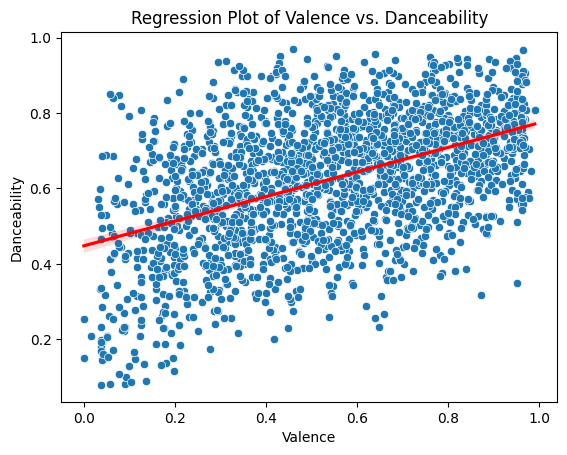

In [4]:
#Author: TS
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # plots
import seaborn as sns # best fit line

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Analysis 1: Valence vs Danceability

#get datasets created with awk script
dance_df = pd.read_csv("/kaggle/input/danc-val/dance-val.csv", delimiter="^")

#dance_df.info()
# Plot data 
dance_sample_df = dance_df[(dance_df['Valence'] > 0.0) & (dance_df['Danceability'] > 0.0)]
dance_sample_graph_df=dance_sample_df.sample(n=2000, random_state=42)

dance_scatter = sns.scatterplot(x='Valence', y='Danceability', data=dance_sample_graph_df)
# Calculate best-fit line
plt.title('Regression Plot of Valence vs. Danceability')
dance_graph = sns.regplot(x='Valence', y='Danceability', data=dance_sample_graph_df, scatter=False, line_kws={'color':'red'})

#Get top 5 sad songs and top 5 happy songs with high danceability
top_sad_songs = dance_sample_df[dance_sample_df['Valence'] < 0.33].nlargest(10, 'Danceability')
top_happy_songs = dance_sample_df[dance_sample_df['Valence'] >= 0.8].nlargest(10, 'Danceability')

# Filter out duplicate track names
top_sad_songs_unique = top_sad_songs.drop_duplicates(subset=['Track'])
top_happy_songs_unique = top_happy_songs.drop_duplicates(subset=['Track'])

# Take the top 5 unique sad songs
top_sad_songs_unique = top_sad_songs_unique.head(5)
top_happy_songs_unique = top_happy_songs_unique.head(5)

print("Top 5 happy songs with high danceability:")
print(top_happy_songs_unique)

print("\nTop 5 sad songs with high danceability:")
print(top_sad_songs_unique)


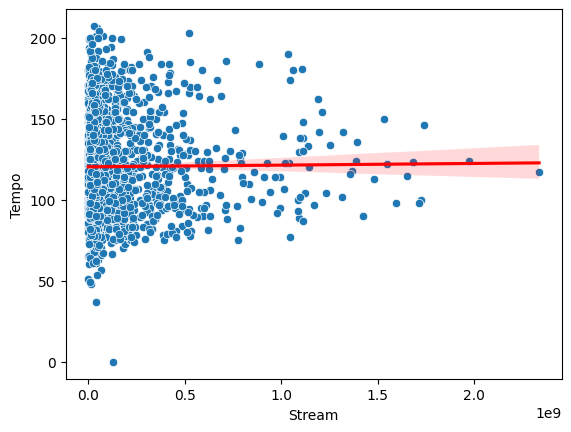

In [10]:
#Analysis 2: Tempo vs Streams
tempo_df = pd.read_csv("/kaggle/input/temp-stream/tempo-stream.csv", delimiter="^") #get data

# Plot data 
tempo_sample_df = tempo_df.sample(n=2000, random_state=42)
tempo_scatter = sns.scatterplot(x='Stream', y='Tempo', data=tempo_sample_df)
# Calculate and plot the best-fit line
tempo_graph = sns.regplot(x='Stream', y='Tempo', data=tempo_sample_df, scatter=False, line_kws={'color':'red'})

#get top 5 songs with energy and top 5 with tempo

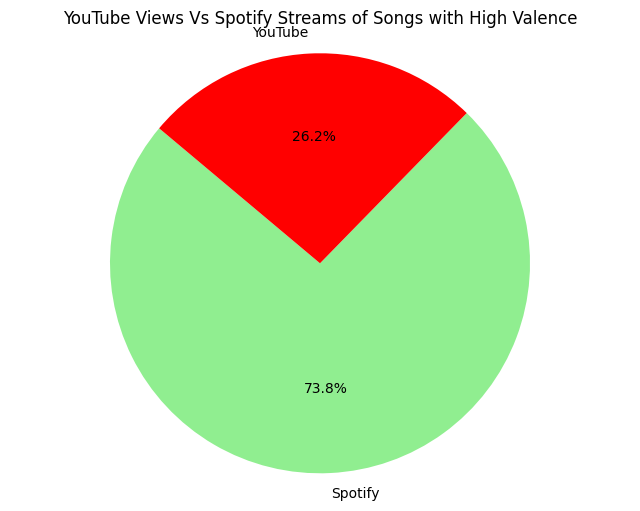

In [11]:
#Analysis #3 : YT vs SP - Valence
data = pd.read_csv("/kaggle/input/new-sp-yt/New_Spotify_Youtube.csv", delimiter="^")

data_df = data.sample(n=2000, random_state=42)

# Filter songs with valence above 0.66
high_valence_songs = data_df[data_df['Valence'] > 0.75]


# Count the number of songs with more Spotify streams and more YouTube views
spotify_more = high_valence_songs[high_valence_songs['Stream'] > high_valence_songs['Views']].shape[0]
youtube_more = high_valence_songs[high_valence_songs['Views'] > high_valence_songs['Stream']].shape[0]

# Pie chart labels
labels = ['Spotify', 'YouTube']
sizes = [spotify_more, youtube_more]
colors = ['lightgreen', 'red']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('YouTube Views Vs Spotify Streams of Songs with High Valence')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()